In [1]:
import os
import json
from keras.models import load_model
from utils.preprocessing import prepareTestingData
from utils.prediction import get_results, get_tSNE

Using TensorFlow backend.


In [2]:
with open('./information/prediction.json') as info:
    prediction_info = json.load(info)

In [3]:
gpu_number    = prediction_info['gpu_number']
testImgPath   = prediction_info['testImgPath']
PXRmodel_path = prediction_info['PXRmodel_path']
testBatchSize = prediction_info['testBatchSize']
imgSize       = prediction_info['imgSize']
youden_index  = prediction_info['youden_index']
intermediate_layername = prediction_info['intermediate_layername']

In [4]:
os.environ["CUDA_VISIBLE_DEVICES"] = str(gpu_number)

In [5]:
imgs, labels, positive_image_number, negative_image_number = prepareTestingData(testImgPath, imgSize)

Found 688 images belonging to 2 classes.
loading images...


In [6]:
model = load_model(PXRmodel_path)
predicted_probability = model.predict(imgs, batch_size=testBatchSize, verbose=1)

688/688 [==============================] - 13s 18ms/step


In [7]:
TP, TN, FP, FN, FPidx, FNidx, Accuracy, Sensitivity, Specificity, f1 = \
get_results(labels, predicted_probability, positive_image_number, negative_image_number, 0.5)
print('TP = %s\nTN = %s\nFP = %s \nFN = %s'%(TP,TN,FP,FN))
print('Accuracy    = %s'%(int(Accuracy*10000)/100)+'%')
print('Sensitivity = %s'%(int(Sensitivity*10000)/100)+'%')
print('Specificity = %s'%(int(Specificity*10000)/100)+'%')
print('F1-score    = %s'%(int(f1 *10000)/100)+'%')

TP = 350
TN = 295
FP = 14 
FN = 29
Accuracy    = 93.75%
Sensitivity = 92.34%
Specificity = 95.46%
F1-score    = 94.21%


688/688 [==============================] - 9s 13ms/step
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 688 samples in 0.002s...
[t-SNE] Computed neighbors for 688 samples in 0.050s...
[t-SNE] Computed conditional probabilities for sample 688 / 688
[t-SNE] Mean sigma: 61.377796
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.000034
[t-SNE] KL divergence after 1000 iterations: 0.511985


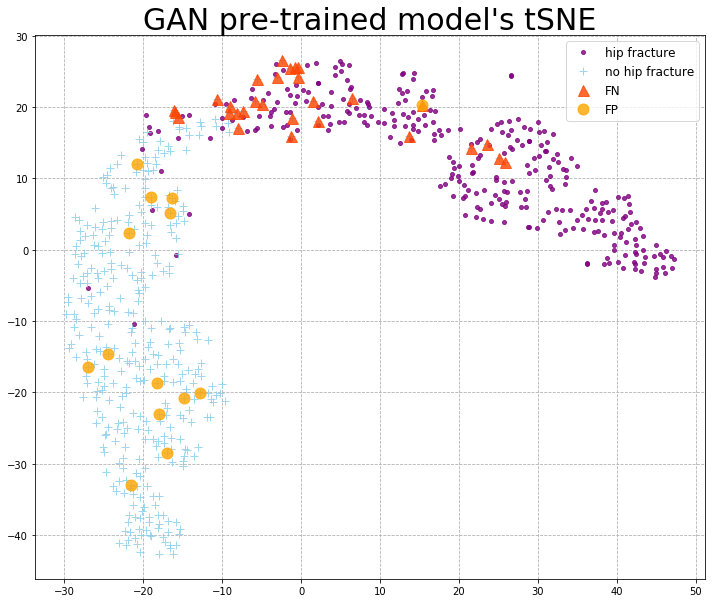

In [8]:
fig = get_tSNE(model, intermediate_layername, imgs, labels, testBatchSize, FPidx, FNidx)
fig